In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import Image

In [2]:
from plotly.widgets import GraphWidget

<IPython.core.display.Javascript object>

In [3]:
help(GraphWidget)

Help on class GraphWidget in module plotly.widgets.graph_widget:

class GraphWidget(ipywidgets.widgets.domwidget.DOMWidget)
 |  An interactive Plotly graph widget for use in IPython
 |  Notebooks.
 |  
 |  Method resolution order:
 |      GraphWidget
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, graph_url='https://plot.ly/~playground/7', **kwargs)
 |      Initialize a plotly graph widget
 |      
 |      Args:
 |          graph_url: The url of a Plotly graph
 |      
 |      Example:
 |          ```
 |          GraphWidget('https://plot.ly/~chris/3375')
 |          ```
 |  
 |  add_traces(self, traces, new_indices=None)
 |      Add new data traces to a graph.
 |      
 |      If `new_indices` isn't specified, they are simply appended.

### Initialize a Graph widget with a Plotly URL

In [4]:
url = py.plot({'data': [go.Scatter(x=[1, 2, 3], y=[4, 6, 9]), go.Scatter(x=[1, 2, 3], y=[10, 30, 20])]}, 
               filename = 'widget template', auto_open=False)
print url

https://plot.ly/~PythonPlotBot/2687


In [5]:
graph = GraphWidget(url)
g = graph
graph

GraphWidget()

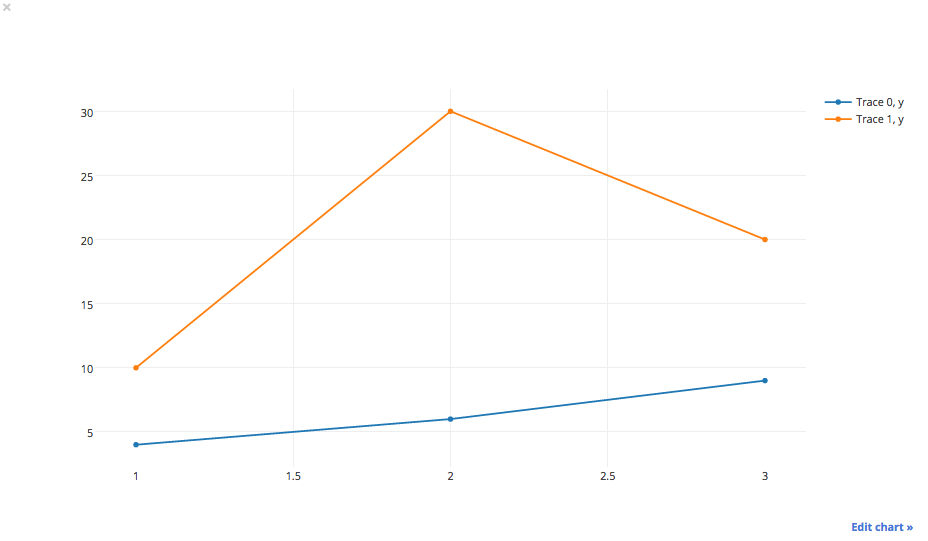

In [6]:
# Which would render as the following
Image("https://cloud.githubusercontent.com/assets/12302455/15342229/9e54d8e2-1c61-11e6-95dc-9c87f1c1b24a.png")

### Update the Plotly graph. This is done entirely on the client

In [7]:
help(graph.restyle)

Help on method restyle in module plotly.widgets.graph_widget:

restyle(self, update, indices=None) method of plotly.widgets.graph_widget.GraphWidget instance
    Update the style of existing traces in the Plotly graph.
    
    Args:
        update (dict):
            dict where keys are the graph attribute strings
            and values are the value of the graph attribute.
    
            To update graph objects that are nested, like
            a marker's color, combine the keys with a period,
            e.g. `marker.color`. To replace an entire nested object,
            like `marker`, set the value to the object.
            See Example 2 below.
    
            To update an attribute of multiple traces, set the
            value to an list of values. If the list is shorter
            than the number of traces, the values will wrap around.
            Note: this means that for values that are naturally an array,
            like `x` or `colorscale`, you need to wrap the value
 

In [8]:
graph.restyle({'name': ['control', 'experiment']})

In [9]:
graph.relayout({'xaxis.title': 'samples'})

In [10]:
graph.add_traces(go.Scatter(x=[1,2,3], y=[5, 4, 5], name='another sample'))

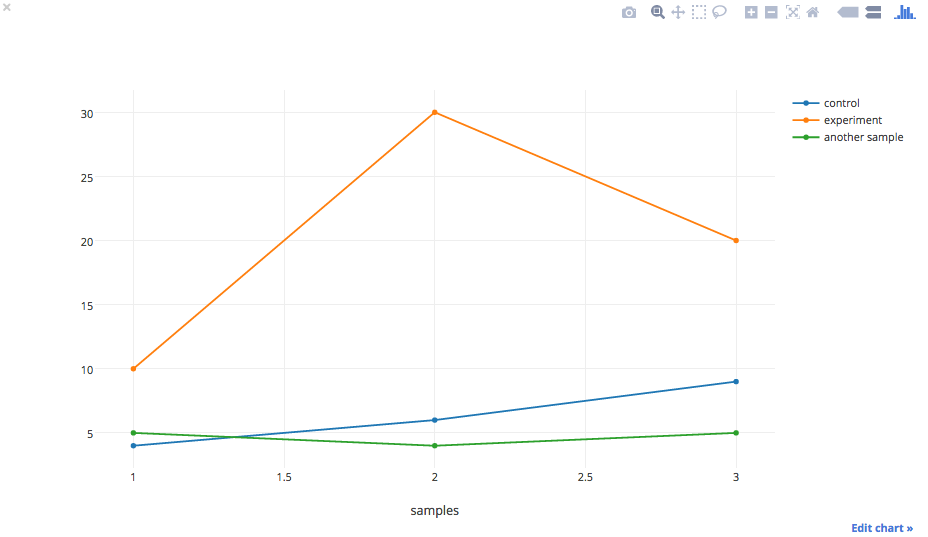

In [11]:
Image('https://cloud.githubusercontent.com/assets/12302455/15342272/079e0a58-1c62-11e6-926c-a364af809c4a.png')

### Update the graph's data


In [12]:
g.restyle({'x': [[1,2,3], 
               [1, 2, 4]],
         'y': [6*[10,20,35]]
}, indices=[0, 1])

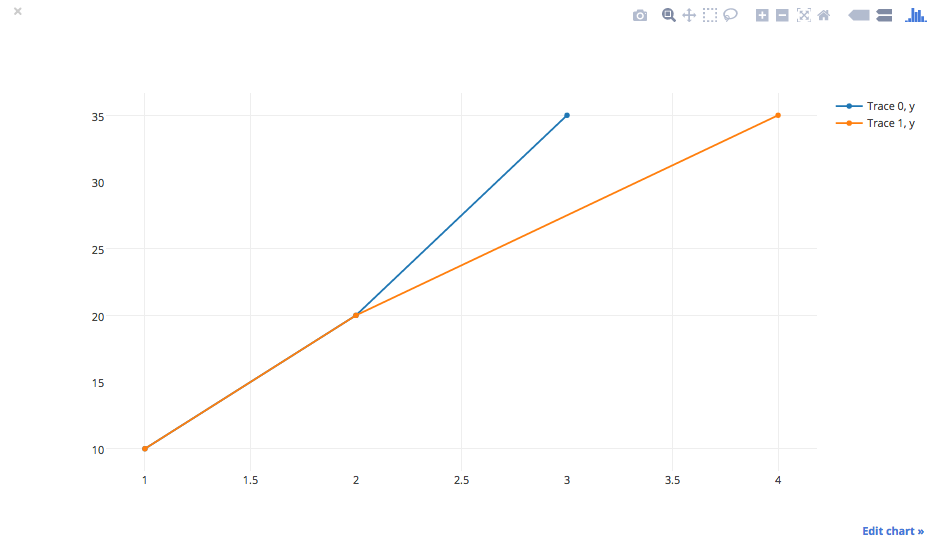

In [13]:
Image('https://cloud.githubusercontent.com/assets/12302455/15342288/2aff6aa0-1c62-11e6-8f05-7cd15a49d9fa.png')

### Assign handlers to 'click', 'hover', and 'zoom' events

In [14]:
from IPython.display import display, clear_output
def message_handler(widget, msg):
    clear_output()
    print widget._graph_url
    display(msg)

g.on_click(message_handler)
g.on_hover(message_handler)
g.on_zoom(message_handler)

### Manual hover over points

In [15]:
g.hover({'xval': 2, 'yval': 8})

### Here is a sequence of graph edits

In [16]:
Image(url='http://i.imgur.com/69wyqjV.gif')

In [17]:
graph #display the graph again

GraphWidget()

In [ ]:
from IPython.html import widgets # Widget definitions
import json
import time

style_sequence = [
    # Clear graph
    {
        'data': {
            'x': [],
            'y': [],
            'marker.color': '',
            'marker.size': '',
            'marker.symbol': '',
            'line.color': '',
            'line.width': '',
            'name': ''
        },
        'layout': {
            'title': '',
            'showlegend': False,
            'legend.x': '',
            'legend.y': '',
            'legend.bgcolor': ''
        },
        'hover': {}
    },
    # Add data
    {
        'data': {
            'x': [[1,2,3],
                  [1, 2, 4]],
         'y': [[10,20,30],
               [5, 8, 14]]
        },
        'traces': [0, 1]
    },
    # Restyle markers
    {
        'data': {
            'marker.color': ['rgb(0, 67, 88)', 'rgb(31, 138, 112)'],
            'marker.size': 10,
            'marker.symbol': 'hexagon-open'
        },
        'traces': [0, 1]
    },
    # Restyle lines
    {
        'data': {
            'line.color': ['rgb(0, 67, 88)', 'rgb(31, 138, 112)'],
            'line.width': 3
        }
    },
    # Add title
    {
        'layout': {
            'title': 'Trials',
        }
    },
    # Add legend
    {
        'layout': {
            'showlegend': True,
        }
    },
    # Add legend names
    {
        'data': {
            'name': ['Control', 'Experiment']
        },
        'traces': [0, 1]
    },
    # Move legend
    {
        'layout': {
            'legend.x': 0.02,
            'legend.y': 1,
            'legend.bgcolor': 'rgba(255, 255, 255, 0.5)'
        }
    },
    {'hover': {'xval': 2, 'yval': 8}},
    {'hover': {'xval': 2, 'yval': 8, 'hovermode': 'closest'}},
    {'xval': 2, 'yval': 8, 'hovermode': 'x'},
    {'hover': [{'curveNumber': 0, 'pointNumber': 0}]},
    {'hover': [{'curveNumber': 0, 'pointNumber': 0},
     {'curveNumber': 0, 'pointNumber': 1}]},
    {'hover': [{'curveNumber': 0, 'pointNumber': 2},
     {'curveNumber': 1, 'pointNumber': 1}]},
    {'hover': [{'curveNumber': 0, 'xval': 1, 'yval': 10},
     {'curveNumber': 0, 'xval': 2, 'yval': 20},
     {'curveNumber': 0, 'xval': 3, 'yval': 30},
     {'curveNumber': 1, 'xval': 1, 'yval': 5},
     {'curveNumber': 1, 'xval': 2, 'yval': 8},
     {'curveNumber': 1, 'xval': 4, 'yval': 14}
    ]}
]

for s in style_sequence:
    if 'data' in s:
        if 'traces' in s:
            g.restyle(s['data'], indices=s['traces'])
        else:
            g.restyle(s['data'])
    if 'layout' in s:
        g.relayout(s['layout'])
    if 'hover' in s:
        g.hover(s['hover'])
    time.sleep(3)



In [19]:
# CSS styling within IPython notebook - feel free to re-use
#from IPython.core.display import HTML
#import urllib2

#HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

In [20]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install publisher --upgrade
import publisher
publisher.publish(
    'plotly_widgets.ipynb', 'python/ipython-widgets//', 'IPython Notebook Widgets',
    'How to make IPython Notebook Widgets in Python with Plotly.',
    name = 'IPython Notebook Widgets',
    thumbnail='thumbnail/ipython_widgets.jpg', language='python',
    page_type='example_index', has_thumbnail='true', display_as='chart_events', order=0,
    ipynb= '~notebook_demo/89')  

Requirement already up-to-date: publisher in c:\python36\lib\site-packages (0.11)


C:\Python27\lib\site-packages\IPython\nbconvert.py:13: ShimWarning:

The `IPython.nbconvert` package has been deprecated since IPython 4.0. You should import from nbconvert instead.

C:\Python27\lib\site-packages\publisher\publisher.py:53: UserWarning:

Did you "Save" this notebook before running this command? Remember to save, always save.

C:\Python27\lib\site-packages\publisher\publisher.py:58: UserWarning:

Your URL has more than 2 parts... are you sure?

